In [1]:
# import classy module
from classy import Class

In [2]:
model = Class()
var_name = 'Omega_cdm'
var_min = 0.50
var_max = var_min + 0.40
var_num = 5
var = {}
common_settings ={'Omega_b':0.022,'output':'tCl,pCl,lCl','lensing':'yes','root': 'output/base_',
                  'background_verbose':1, 'thermodynamics_verbose':1, 'perturbations_verbose':1, 'transfer_verbose':1,
                  'primordial_verbose': 1, 'spectra_verbose':1, 'nonlinear_verbose':1, 'lensing_verbose':1, 'output_verbose':1}

for i in range(var_num):
    # calculate curvature
    var_value = var_min + (var_max-var_min)*i/(var_num-1.)
    model.set(common_settings)
    model.set({var_name:var_value})
    model.compute()
    var[i] = model.lensed_cl(2500)
    model.struct_cleanup


In [3]:
%matplotlib notebook
import matplotlib.pyplot as plt
from math import pi

<IPython.core.display.Javascript object>


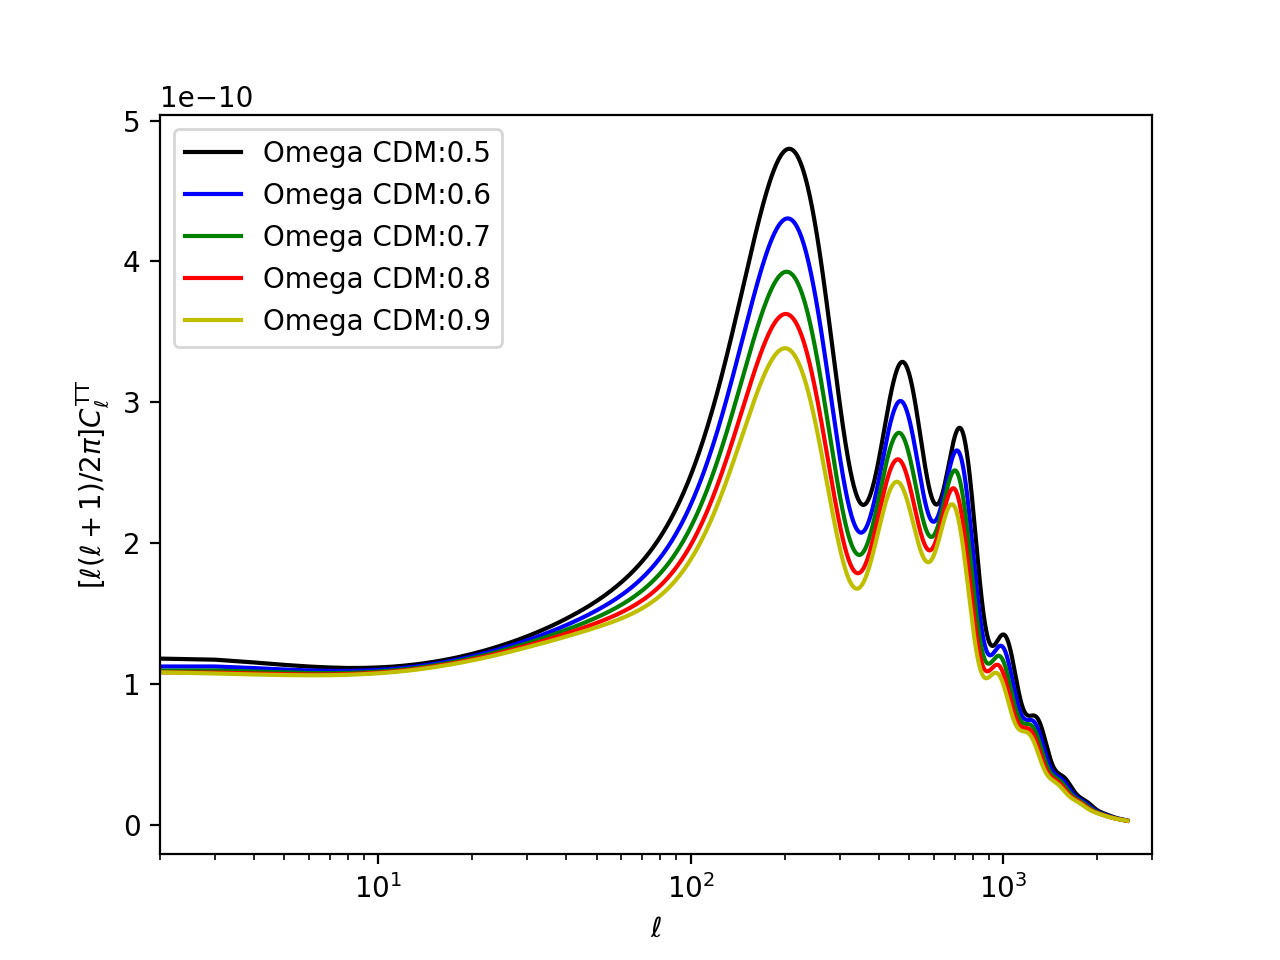

/anaconda3/lib/python3.6/site-packages/matplotlib/legend.py:638: UserWarning: Unrecognized location "left". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


In [5]:
# increasing density of dark matter decreases the amplitude of the peaks
clTT_arr = {}
ll_arr = {}
plt.figure(1)
plt.xscale('log');plt.yscale('linear');plt.xlim(2,3000)
color = ['k-', 'b-', 'g-', 'r-', 'y-']
for i in range(var_num):
    var_value = var_min + (var_max-var_min)*i/(var_num-1.)
    lab = 'Omega CDM:' + str(var_value)
    ll_arr[i] = var[i]['ell'][2:]
    clTT_arr[i] = var[i]['tt'][2:]
    plt.plot(ll_arr[i],clTT_arr[i]*ll_arr[i]*(ll_arr[i]+1)/2./pi, color[i], label = lab)
    
 
plt.xlabel(r'$\ell$')
plt.ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{TT}$')
plt.legend(loc='left')
plt.show()
plt.savefig('CDM_density.pdf')